# Selecting Best Reviewers for gaming reviews in a Data Driven Approach

John Zheng 

In [ ]:
import pandas as pd 

author_import  = pd.read_csv("data/author_info.csv")
game_import  = pd.read_csv("data/game_info.csv")
purchase_import  = pd.read_csv("data/purchase_info.csv")
review_import  = pd.read_csv("data/review_info.csv")


In [ ]:


df_1 = _deepnote_execute_sql("""select review_id,
language,
review,
timestamp_created,
timestamp_updated,
recommended,
votes_helpful,
votes_funny,
weighted_vote_score,
comment_count,
steam_purchase,
received_for_free,
written_during_early_access,
app_id,
app_name,
CAST("author.steamid" as VARCHAR(20)) as steam_id,
"author.num_games_owned" as num_games_owned,
"author.num_reviews" as num_reviews,
"author.playtime_forever" as playtime_forever,
"author.playtime_last_two_weeks" as playtime_last_two_weeks,
"author.playtime_at_review" as playtime_at_review,
"author.last_played" as last_played


From review_import as a 
JOIN purchase_import as b 
USING(review_id)
JOIN game_import
USING(review_id)
JOIN author_import
USING(review_id)
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_1

,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,...,written_during_early_access,app_id,app_name,steam_id,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,68675252,russian,"Божечки, это же 10/10",1588772815,1588772815,True,0,0,0.000000,0,...,False,489830,The Elder Scrolls V: Skyrim Special Edition,76561198199699706,56,3,5552.0,0.0,5517.0,1.588775e+09
1,68675154,english,"What can I say, the best game ever?\nThe BEST ...",1588772690,1588772690,True,0,0,0.000000,0,...,False,489830,The Elder Scrolls V: Skyrim Special Edition,76561198320854803,112,8,33707.0,0.0,27915.0,1.593310e+09
2,68674806,english,good,1588772228,1591709306,True,1,0,0.523810,0,...,False,489830,The Elder Scrolls V: Skyrim Special Edition,76561198282201987,17,9,3166.0,0.0,2633.0,1.603555e+09
3,68673945,russian,WDPSLDFLZLD\n,1588771138,1588771138,True,0,0,0.000000,0,...,False,489830,The Elder Scrolls V: Skyrim Special Edition,76561199016358734,3,2,6579.0,0.0,3569.0,1.608999e+09
4,68670882,russian,"Спешл эдишн дали халявно, т.к. ранее покупал о...",1588767094,1588767094,True,0,0,0.000000,0,...,False,489830,The Elder Scrolls V: Skyrim Special Edition,76561198236134140,39,5,10588.0,0.0,10441.0,1.593180e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,47313627,russian,"Всем салют! Сразу скажу, что я, как очевидно и...",1544037600,1544037669,True,2,1,0.519231,0,...,False,517630,Just Cause 4,76561198024373318,33,2,5209.0,0.0,770.0,1.606487e+09
999996,47312590,french,Aucun problème pour ma part.\nTrès fun à jouer.,1544033480,1544033480,True,0,0,0.476190,0,...,False,517630,Just Cause 4,76561198005049594,221,1,587.0,0.0,282.0,1.609497e+09
999997,47312189,english,I'm a huge fan of the Just Cause games. I'm h...,1544032003,1544477906,True,0,0,0.000000,0,...,False,517630,Just Cause 4,76561198069526558,346,25,1208.0,0.0,897.0,1.545581e+09
999998,47311775,german,2 Std. angespielt. Rückerstattung beantragt. I...,1544030332,1544030374,False,5,0,0.530755,3,...,False,517630,Just Cause 4,76561197979686349,192,12,113.0,0.0,113.0,1.544030e+09


In [ ]:
# Let's check our data types

df_1.dtypes

review_id                        int64
language                        object
review                          object
timestamp_created                int64
timestamp_updated                int64
recommended                       bool
votes_helpful                    int64
votes_funny                      int64
weighted_vote_score            float64
comment_count                    int64
steam_purchase                    bool
received_for_free                 bool
written_during_early_access       bool
app_id                           int64
app_name                        object
steam_id                        object
num_games_owned                  int64
num_reviews                      int64
playtime_forever               float64
playtime_last_two_weeks        float64
playtime_at_review             float64
last_played                    float64
dtype: object

In [ ]:
# Which users (steam_ids) had the most 'votes_helpful' on their reviews
# Let's create a DataFrame of these values
most_votes = df_1.groupby("steam_id")["votes_helpful"].sum().reset_index().sort_values("votes_helpful", ascending=False)
most_votes

,steam_id,votes_helpful
675371,76561198301678331,26149
280175,76561198068792591,15526
396630,76561198107977827,14349
252475,76561198060932732,10610
563810,76561198193312194,10495
...,...,...
393872,76561198106854665,0
393873,76561198106856153,0
393875,76561198106856636,0
393876,76561198106856949,0


In [ ]:
# Which users had the most reviews done? Let's create a DataFrame of those values
most_reviews = df_1.groupby("steam_id")["review_id"].count().reset_index().sort_values("review_id", ascending = False)
most_reviews

,steam_id,review_id
691805,76561198315585536,22
605538,76561198239163744,20
258582,76561198062813911,19
200553,76561198045381877,17
277670,76561198068116100,17
...,...,...
319902,76561198080424312,1
319903,76561198080424324,1
319904,76561198080424388,1
319905,76561198080424757,1


In [ ]:
# Let's merge the last two DataFrames that we created into one so we can analyze One-Hit-Wonders
merged_data = pd.merge(left  =most_votes, right = most_reviews, how = "inner", on = "steam_id" )
merged_data


,steam_id,votes_helpful,review_id
0,76561198301678331,26149,1
1,76561198068792591,15526,1
2,76561198107977827,14349,1
3,76561198060932732,10610,2
4,76561198193312194,10495,1
...,...,...,...
912548,76561198106854665,0,2
912549,76561198106856153,0,1
912550,76561198106856636,0,1
912551,76561198106856949,0,1


In [ ]:
import plotly.express as px
px.histogram(merged_data, x ="review_id", template = "simple_white", title = "Reviews count per reviewers")

# Let's create a histogram of the Reviews per Reviewer



In [ ]:
# Let's create a DataFrame with Cumulative Percentage as a column so that we can 
    # create our Pareto chart
pareto_chart = merged_data.groupby("review_id")["steam_id"].count().reset_index()
pareto_chart['cumperc'] = pareto_chart['steam_id'].cumsum()/pareto_chart['steam_id'].sum()*100
pareto_chart


,review_id,steam_id,cumperc
0,1,843838,92.470026
1,2,56007,98.607423
2,3,9085,99.602982
3,4,2340,99.859405
4,5,751,99.941702
5,6,280,99.972385
6,7,112,99.984658
7,8,53,99.990466
8,9,43,99.995178
9,10,26,99.998028


# Analysis of Top Reviewers

Over 92% of reviewers have only reviewed a single game, we probably won't be giving gift cards to people who have only written one review even if it was a stellar one, let's limit data to people who have written more reviews

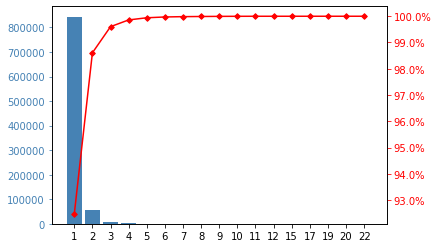

In [ ]:
# https://www.statology.org/pareto-chart-python/

# Let's create a Pareto Chart using the data from the website above
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(pareto_chart.index, pareto_chart['steam_id'], color=color1)
ax.set_xticks(pareto_chart.index, pareto_chart["review_id"].values)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(pareto_chart.index, pareto_chart['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()
# Let's create a Pareto Chart using the data from the website above

Change the below sliders to look at different cohorts

In [ ]:
# Add two "slider" blocks below so the stakeholder can change the definition of "top-reviewer"

In [ ]:
games_reviewed = 4

In [ ]:
votes_helpful = 300

In [ ]:
# Let's use the parameters established by the sliders above to limit our full DataFrame to 
    # just the "top-reviewers"
top_reviewers = merged_data[(merged_data["votes_helpful"] >= votes_helpful) & (merged_data["review_id"] >= games_reviewed)]["steam_id"].values
top_reviewers_data = df_1[df_1["steam_id"].isin(top_reviewers)]
top_reviewers_data

,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,...,written_during_early_access,app_id,app_name,steam_id,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
34680,54952173,german,"""Wide as an ocean, shallow as a puddle"" - Quan...",1567537471,1567537471,True,18,3,0.697373,0,...,False,489830,The Elder Scrolls V: Skyrim Special Edition,76561198037429842,4029,298,3191.0,0.0,3190.0,1.603626e+09
34734,54836996,russian,Оригинальная игра и DLC к ней: \nhttps://store...,1566902925,1566902925,False,633,23,0.896432,33,...,False,489830,The Elder Scrolls V: Skyrim Special Edition,76561198061514868,1513,231,4193.0,0.0,4193.0,1.547179e+09
42459,51112620,schinese,1000小时后过来发评测。\n游戏本体内容和MOD扩展性相关的东西我就不说了，大家看其他人的...,1559978589,1559978589,True,258,19,0.932274,12,...,False,489830,The Elder Scrolls V: Skyrim Special Edition,76561198043336844,211,49,93971.0,0.0,60771.0,1.581237e+09
44194,49704965,english,The Canadian winter of 2011: I remember it wel...,1553305262,1553305354,True,655,227,0.942581,41,...,False,489830,The Elder Scrolls V: Skyrim Special Edition,76561198010371788,570,153,1994.0,0.0,586.0,1.588529e+09
44365,49467832,english,"a sound track of glory, an adventure of hardsh...",1552169306,1552169306,True,0,0,0.000000,0,...,False,489830,The Elder Scrolls V: Skyrim Special Edition,76561198199811506,146,41,2789.0,0.0,604.0,1.595256e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994020,54981041,english,"Like every single person before me, I find Jus...",1567728534,1568582554,False,0,0,0.572077,0,...,False,517630,Just Cause 4,76561197972527687,795,212,3395.0,0.0,356.0,1.571179e+09
995242,51065770,english,get just cause 3 its better,1559754222,1559754222,False,413,83,0.874676,0,...,False,517630,Just Cause 4,76561198199811506,146,41,944.0,0.0,274.0,1.604955e+09
995723,50166905,russian,"Игра не так плоха, как может показаться. Если ...",1555458714,1555458714,True,57,4,0.676083,3,...,False,517630,Just Cause 4,76561198005667066,2853,559,1621.0,0.0,1524.0,1.555524e+09
996039,49279948,schinese,最后综合想了想，这款游戏我决定还是给个好评吧\n\n太长不看总评：\n\n+++爆炸的艺术，...,1551366759,1551513983,True,74,19,0.837782,1,...,False,517630,Just Cause 4,76561198020487283,4522,484,6409.0,0.0,2888.0,1.551860e+09


In [ ]:
# Print out the values for the cohort size

print("Cohort size: ", len(top_reviewers))

Cohort size:  80


In [ ]:
# Reviewer Analysis
    # Number of Games
    # Playtime per game Reviewed

# Review Analysis
    # Character length of average review
    # Average comments

In [ ]:
# Create a DataFrame and graph for the Number of Games owned by the "top-reviewers"
number_games_owned = top_reviewers_data.groupby("steam_id")["num_games_owned"].max().reset_index().sort_values("num_games_owned", ascending =False)
px.histogram(number_games_owned, x = "num_games_owned", template = "simple_white", title = "Top reviewers games owned on steam")

In [ ]:
# Create a DataFrame and Graph for the Playtime per Game for Top Reviewers
avg_play_time = top_reviewers_data.groupby("steam_id")["num_games_owned", "playtime_forever"].max().reset_index()
avg_play_time["playtime_per_game"] = avg_play_time["playtime_forever"] / avg_play_time["num_games_owned"]
avg_play_time["playtime_per_game"] = avg_play_time["playtime_per_game"].apply(lambda x: round(x, 2))
avg_play_time
px.histogram(avg_play_time, x = "playtime_per_game", template = "simple_white", title = "Playtime per game for Top Reviewers")

<ipython-input-45-f6a59c0f9771>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
# Create a Column for review_length and graph a histogram of review length
top_reviewers_data["review_length"] = top_reviewers_data["review"].str.len()
top_reviewers_data
px.histogram(top_reviewers_data, x = "review_length", template = "simple_white", title = "Review length for top reviewers")

<ipython-input-50-96b00d7ac433>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Let's plot a histogram of the number of comments on the reviews of "top-reviewers"
px.histogram(top_reviewers_data, x = "comment_count", template = "simple_white", title = "Comments count for top reviewers")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4e3dedef-0e4c-499d-bf63-5554879249eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>